## Libraries

In [1]:
import json

import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from wordcloud import WordCloud

import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from PIL import Image
from torchvision.transforms import functional as F


## Dataset

Annotations

In [2]:
with open('./Dataset/SSID_Annotations/SSID_Train.json') as f:
    train_data = json.load(f)
    
with open('./Dataset/SSID_Annotations/SSID_Test.json') as f:
    test_data = json.load(f)

with open('./Dataset/SSID_Annotations/SSID_Validation.json') as f:
    val_data = json.load(f)

Convert to DataFrame

In [3]:
flattened_data = [item for sublist in train_data['annotations'] for item in sublist]
train_df = pd.DataFrame(flattened_data)

flattened_data = [item for sublist in test_data['annotations'] for item in sublist]
test_df = pd.DataFrame(flattened_data)

flattened_data = [item for sublist in val_data['annotations'] for item in sublist]
val_df = pd.DataFrame(flattened_data)

In [4]:
train_df

,storylet_id,storytext,youtube_image_id,album_id,story_id,image_order
0,5887,Today I am in my friends house and he is very ...,2001,10856,5887,1
1,5888,He is telling me about his car.,2002,10856,5887,2
2,5889,He is telling me about his car's feature.,2003,10856,5887,3
3,5890,The car color is white and it looks awesome an...,2004,10856,5887,4
4,5891,Now he is telling me about all doors and seats...,2005,10856,5887,5
...,...,...,...,...,...,...
62495,41431,Seem like two girls,16996,25851,41431,1
62496,41432,One man is starting to space off,16997,25851,41431,2
62497,41433,The girls seem happy,16998,25851,41431,3
62498,41434,The man is on the couch with them.,16999,25851,41431,4


## Visualistion

In [5]:
train_df['storytext_length'] = train_df['storytext'].apply(lambda x: len(x.split()))
test_df['storytext_length'] = test_df['storytext'].apply(lambda x: len(x.split()))
val_df['storytext_length'] = val_df['storytext'].apply(lambda x: len(x.split()))


In [6]:
train_df 

,storylet_id,storytext,youtube_image_id,album_id,story_id,image_order,storytext_length
0,5887,Today I am in my friends house and he is very ...,2001,10856,5887,1,14
1,5888,He is telling me about his car.,2002,10856,5887,2,7
2,5889,He is telling me about his car's feature.,2003,10856,5887,3,8
3,5890,The car color is white and it looks awesome an...,2004,10856,5887,4,11
4,5891,Now he is telling me about all doors and seats...,2005,10856,5887,5,13
...,...,...,...,...,...,...,...
62495,41431,Seem like two girls,16996,25851,41431,1,4
62496,41432,One man is starting to space off,16997,25851,41431,2,7
62497,41433,The girls seem happy,16998,25851,41431,3,4
62498,41434,The man is on the couch with them.,16999,25851,41431,4,8


In [7]:
test_df

,storylet_id,storytext,youtube_image_id,album_id,story_id,image_order,storytext_length
0,5947,Inside the car with his family he talks with e...,2036,10891,5947,1,10
1,5948,While his kids are using their gamers to play ...,2037,10891,5947,2,10
2,5949,A drone takes a picture of the car moving on a...,2038,10891,5947,3,14
3,5950,From the car window you can see a power plant ...,2039,10891,5947,4,13
4,5951,The family arrives at their destination and is...,2040,10891,5947,5,13
...,...,...,...,...,...,...,...
3475,40908,A dirt bike rider rides down a hill.,16761,25616,40908,1,8
3476,40909,Another rider in orange does a wheelie down a ...,16762,25616,40908,2,11
3477,40910,The rider in orange flies through the air over...,16763,25616,40908,3,11
3478,40911,Another rider is close behind the rider in ora...,16764,25616,40908,4,9


In [8]:
val_df

,storylet_id,storytext,youtube_image_id,album_id,story_id,image_order,storytext_length
0,6236,Gettinv ready to take off with the family,2201,11056,6236,1,8
1,6237,The water is beautiful as we rise,2202,11056,6236,2,7
2,6238,Selfy with eveyone as we rise,2203,11056,6236,3,6
3,6239,We're so high even the boat looks small,2204,11056,6236,4,8
4,6240,Awe it was a great ride cant wait to go up again,2205,11056,6236,5,12
...,...,...,...,...,...,...,...
3475,41362,The ballet school had a very long stairway to ...,16966,25821,41362,1,12
3476,41363,The inside was adorned with dancer figurines a...,16967,25821,41362,2,13
3477,41364,Inside the studio stood a group of girls in th...,16968,25821,41362,3,18
3478,41365,Their adult teacher at first seemed stern and ...,16969,25821,41362,4,16


### Histogram

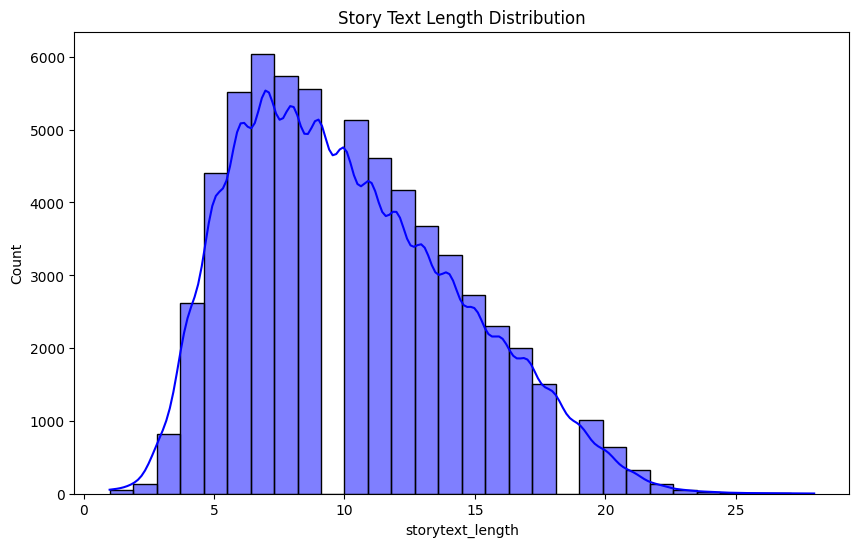

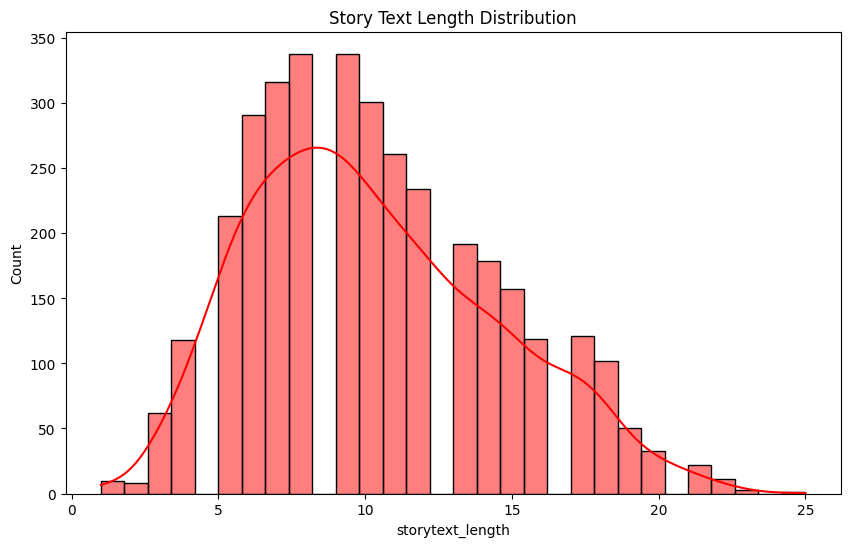

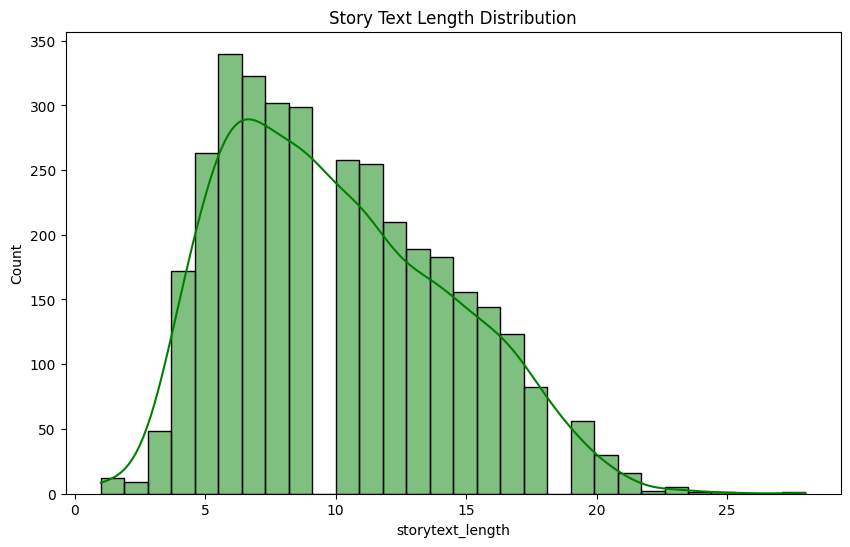

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['storytext_length'], kde=True, color='blue', bins=30)
plt.title('Story Text Length Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(test_df['storytext_length'], kde=True, color='red', bins=30)
plt.title('Story Text Length Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(val_df['storytext_length'], kde=True, color='green', bins=30)
plt.title('Story Text Length Distribution')
plt.show()



In [10]:
train_df['storytext_length'].describe()

count    62500.000000
mean        10.164656
std          4.196830
min          1.000000
25%          7.000000
50%         10.000000
75%         13.000000
max         28.000000
Name: storytext_length, dtype: float64

In [11]:
test_df['storytext_length'].describe()

count    3480.000000
mean       10.259770
std         4.210308
min         1.000000
25%         7.000000
50%        10.000000
75%        13.000000
max        25.000000
Name: storytext_length, dtype: float64

In [12]:
val_df['storytext_length'].describe()

count    3480.000000
mean       10.044828
std         4.287290
min         1.000000
25%         7.000000
50%         9.000000
75%        13.000000
max        28.000000
Name: storytext_length, dtype: float64

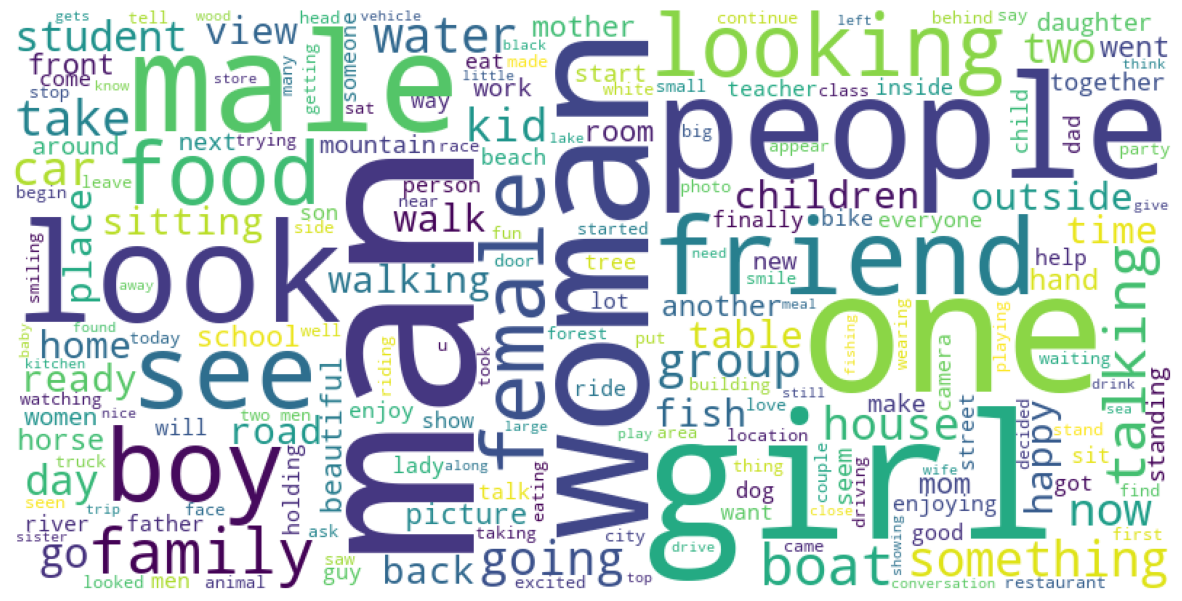

In [13]:
plt.figure(figsize=(15, 10))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(train_df['storytext']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


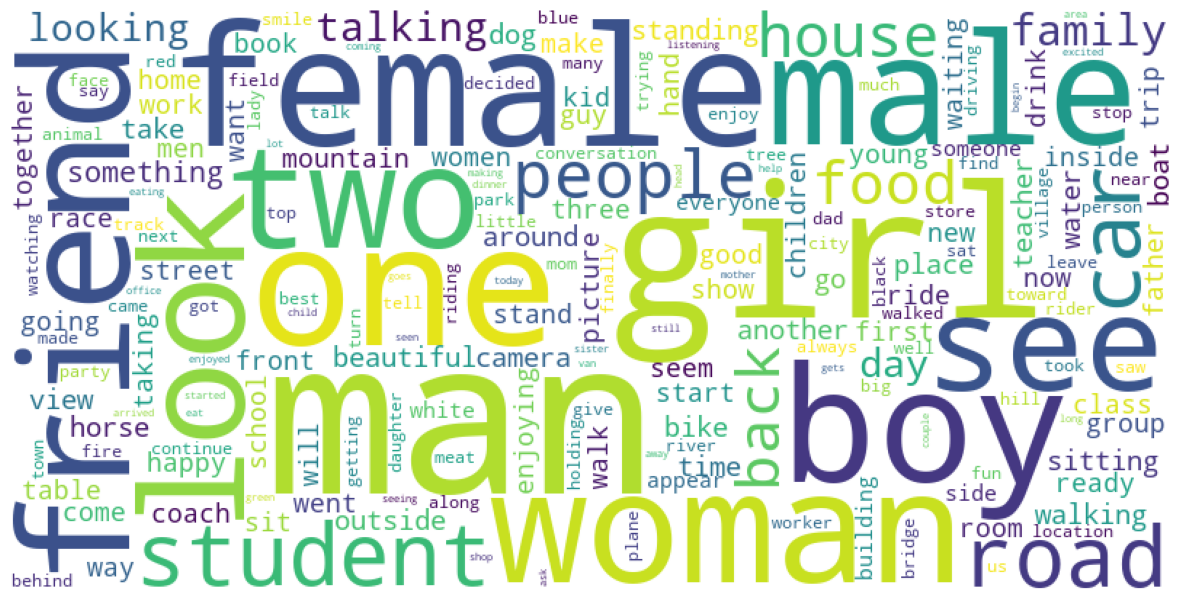

In [14]:
plt.figure(figsize=(15, 10))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(test_df['storytext']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

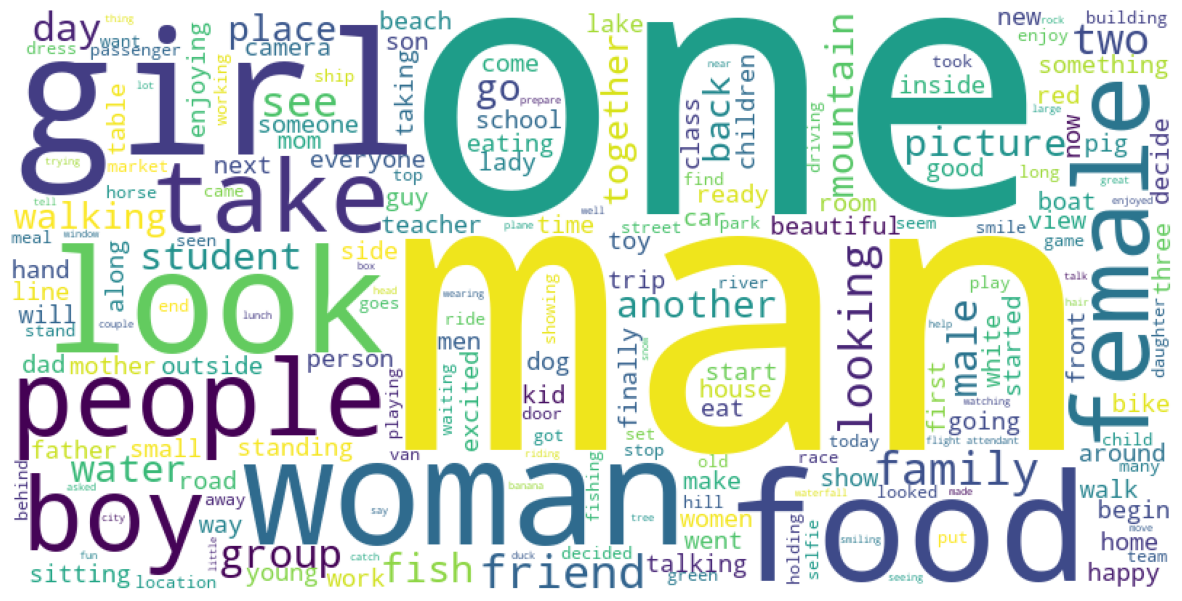

In [15]:
plt.figure(figsize=(15, 10))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(val_df['storytext']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
    

## Visual Feature Extraction

Load an object detector (Faster R-CNN)

In [16]:
detector = fasterrcnn_resnet50_fpn(pretrained=True)
detector.eval()

c:\Users\manav\OneDrive\Desktop\NIT Surathkal\Semester 7\IT-416\Project\.venv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\manav\OneDrive\Desktop\NIT Surathkal\Semester 7\IT-416\Project\.venv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to C:\Users\manav/.cache\torch\hub\checkpoints\fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100.0%


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

Load and preprocess the image

In [19]:
image = Image.open("./Dataset/SSID_Images/1.jpg") 
image_tensor = F.to_tensor(image).unsqueeze(0)

tensor([[204.0594, 169.3643, 235.7577, 255.2627],
        [157.4310, 165.0065, 175.7835, 237.2861],
        [175.7953, 161.6101, 195.3867, 249.1487],
        [209.8404, 173.4522, 230.6924, 223.8252],
        [165.4104, 232.9924, 186.6113, 253.8227],
        [182.3519, 239.1730, 189.9684, 254.3324],
        [173.4191, 238.8257, 189.8605, 254.7526],
        [225.3267, 178.2642, 237.0978, 220.9796],
        [199.1552, 185.3324, 212.3451, 236.5827],
        [164.7843, 231.1650, 204.5631, 254.5754],
        [162.2531, 227.0681, 181.2196, 252.1720],
        [183.8716, 224.5277, 204.0935, 254.7382],
        [166.2147, 237.3088, 181.8996, 249.8260],
        [199.4476, 230.2983, 204.1199, 254.9290],
        [210.7649, 171.9529, 227.0832, 193.0680],
        [193.7452, 222.3976, 204.8182, 254.6331],
        [164.4227, 233.6376, 177.6169, 248.5668],
        [224.8512, 178.0246, 238.5322, 239.0566],
        [173.0467, 241.6286, 185.7812, 252.2340],
        [227.0783, 177.9070, 235.5612, 196.2068],


Extract object detections

In [ ]:
with torch.no_grad():
    detections = detector(image_tensor)[0]

Get the embeddings from detected objects (you may want to filter by confidence)

In [ ]:
visual_embeddings = detections['boxes']  
visual_embeddings